In [90]:
import random
import statistics
import collections 
import math
from matplotlib import pyplot as plt

### Six roulette wheels  ( 18 red, 18 black, 2 green)

In [8]:
population =['red']*18 + ['black']*18+['green']*2
collections.Counter(random.choice(population) for _ in range(6))

Counter({'black': 4, 'red': 2})

In [11]:
collections.Counter(random.choices(population, k=6))

Counter({'black': 5, 'red': 1})

In [13]:
collections.Counter(random.choices(['red', 'black', 'green'],[18,18,2],k=1000))

Counter({'black': 481, 'green': 58, 'red': 461})

In [14]:
481/58

8.293103448275861

### Dealing Cards

In [30]:
deck_dict = collections.Counter(tens=16, lows=36)

In [31]:
deck = list(deck_dict.elements())

In [32]:
deal = random.sample(deck,20)

In [34]:
collections.Counter(deal)

Counter({'lows': 15, 'tens': 5})

In [37]:
deal = random.sample(deck, 52)
remainder = deal[20:]
collections.Counter(remainder)

Counter({'lows': 23, 'tens': 9})

### 5 or more heads from 7 spins of a biased coin

In [39]:
population = ['heads', 'tails']
weights= [6,4]
cumulative_weights = [0.6, 1.0]

random.choices(population, cum_weights=cumulative_weights,k=7)

['tails', 'heads', 'heads', 'heads', 'tails', 'heads', 'heads']

In [43]:
trial = lambda: random.choices(population, cum_weights=cumulative_weights,k=7).count('heads') >= 5

In [45]:
n = 100000
sum(trial() for _ in range(n))/n

0.42156

In [48]:
 trial_bis = lambda: random.choices(population, weights=[0.6,0.4],k=7).count('heads') >= 5
n = 100000
sum(trial_bis() for _ in range(n))/n

0.42013

#### Analytic approach

In [55]:
def comb(n,r):
    return math.factorial(n)//math.factorial(r)//math.factorial(n-r)

In [56]:
comb(5,2)

10

In [59]:
ph = 0.6
ph**5*(1-ph)**2*comb(7,5) + ph**6*(1-ph)**1*comb(7,6) +  ph**7*(1-ph)**0*comb(7,7) 

0.419904

### Probability that the median of 5 samples falls a middle quartile

In [61]:
random.sample(range(1000000),5)

[667552, 682926, 327018, 651881, 679787]

In [62]:
sorted(random.sample(range(1000000),5))[2]

736322

In [69]:
n=1000000
trial = lambda: n//4 < sorted(random.sample(range(n),5))[2] <3*n//4 

In [70]:
x = 100000
sum(trial() for _ in range(x))/x

0.7948

#### Bootstrapping

In [73]:
timings = [ 7.18, 8.59, 12.24, 7.39, 8.16, 8.68, 6.98, 8.31, 9.06, 7.06, 7.67, 10.02, 6.87, 9.07]

In [107]:
mean = statistics.mean(timings)
mean

8.377142857142857

In [75]:
statistics.stdev(timings)

1.4576505256559458

In [83]:
math.sqrt(sum((x-mean)**2 for x in timings)/(len(timings)-1))

1.4576505256559458

In [85]:
def bootsrap(data):
    return random.choices(data,k=len(data))

In [86]:
bootsrap(timings)

[7.39,
 8.59,
 7.18,
 8.68,
 9.07,
 7.18,
 6.98,
 8.16,
 8.16,
 7.06,
 7.18,
 8.31,
 6.98,
 8.68]

In [114]:
c =collections.Counter(int(statistics.mean(bootsrap(timings))*1000)/1000 for _ in range(100000))

In [115]:
list(c.elements())[0:10]

[8.713, 8.713, 8.713, 8.713, 8.713, 8.713, 8.713, 8.713, 8.713, 8.713]

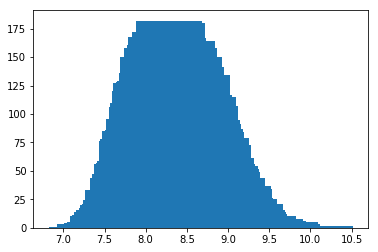

In [119]:
xs = sorted(c.keys())
plt.bar(xs, [c[k]for k in xs])
plt.show()

In [120]:
n= 100000
means = [statistics.mean(bootsrap(timings)) for _ in range(n)]

In [121]:
s_means= sorted(means)

In [122]:
s_means[:10]

[7.189285714285714,
 7.1935714285714285,
 7.215714285714285,
 7.2457142857142856,
 7.251428571428571,
 7.263571428571429,
 7.275714285714286,
 7.279999999999999,
 7.282857142857143,
 7.285714285714286]

In [125]:
s_means[round(0.05*len(s_means))], s_means[round(0.95*len(s_means))]

(7.805, 9.037142857142857)